<a href="https://colab.research.google.com/github/santiagoprado12/Curso-UPV-Machine-Learning-en-R/blob/main/modelosSIR_SEIR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
def media_movil(periodos):
  import pandas as pd
  df = pd.read_csv(r"RT_historico.csv", sep=",", decimal=",")
  df['rt_med_mov'] = df['Rt'].rolling(periodos, min_periods=1).mean()
  rt_lista = df['rt_med_mov'].values.tolist()
  return rt_lista

In [ ]:
rt_lista = media_movil(7)

**MODELO SIR estático**

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

gamma = 1./5.8
##
ro1 = 2.5
beta1 = ro1*gamma
##
ro2= 2.3
beta2 = ro2*gamma
##
ro3 = 2
beta3 = ro3*gamma
##
ro4 = 1.7
beta4 = ro4*gamma
##
ro5 = 1.5
beta5 = ro5*gamma
##
ro6 = 1.3
beta6 = ro6*gamma
##
ro7 = 1.1
beta7 = ro7*gamma
##
valores = [(beta1, gamma), (beta2, gamma), (beta3, gamma), (beta4, gamma), (beta5, gamma), (beta6, gamma), (beta7, gamma)]

t = np.linspace(0, 400, 400)

def modelo(beta,gamma):
  N =   48200000
  I0, R0 = 5, 0
  S0 = N - I0 - R0
  

  def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

  y0 = S0, I0, R0

  ret = odeint(deriv, y0, t, args=(N, beta, gamma))
  S, I, R = ret.T
  return (I)

import cufflinks as cf
import plotly.offline as py

py.iplot([{
   'x': t,
   'y': modelo(*valor),
   'name': str(valor),
}  for valor in valores], filename='cufflinks/multiple-lines-on-same-chart')


MODELO SIR dinámico

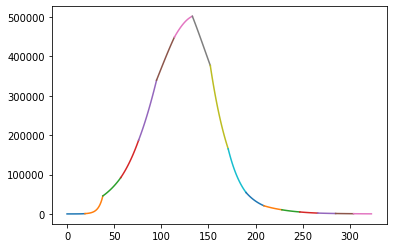

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

t = np.linspace(0, 20, 20)



import cufflinks as cf
import plotly.offline as py

y = []

i_o = 5
r_o = 0

for v in range(0,len(rt_lista),20):
  I , R = modelo(rt_lista[v], i_o, r_o)
  y.append(list(I))
  i_o = I[-1]
  r_o = R[-1]

yn=[]
import matplotlib.pyplot as plt
x1=0
for i,y1 in enumerate(y):  
    x=range(x1,len(y1)*(i+1)-i)
    x1=len(y1)*(i+1)-i-1
  #  plt.plot(x,y1)

for y1 in y:
  for y2 in y1[:-1]:
    yn.append(y2)
xn=list(range(0,len(yn)))
xn
py.iplot([{
   'x': xn,
   'y': yn,
} ])
x1=0
py.iplot([{
   'x': list(range(i*(len(y1)-1),(len(y1))*(i+1))),
   'y': y1,
   'name':str(rt_lista[i])
}  for i,y1 in enumerate(y)], filename='cufflinks/multiple-lines-on-same-chart')

**MODELO SEIR estático**

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

gamma = 1./5.1
sigma = 1./2.9

ro1 = 2.5
beta1 = ro1*gamma

ro2= 2.3
beta2 = ro2*gamma

ro3 = 2
beta3 = ro3*gamma

ro4 = 1.7
beta4 = ro4*gamma

ro5 = 1.5
beta5 = ro5*gamma

ro6 = 1.3
beta6 = ro6*gamma


valores = [(beta1, gamma), (beta2, gamma), (beta3, gamma), (beta4, gamma), (beta5, gamma), (beta6, gamma)]

t = np.linspace(0, 600, 600)

def modelo(beta,gamma):
  N =   48200000
  E0, I0, R0 = 5, 1, 0
  S0 = N - E0 - I0 - R0

  def deriv(y, t, N, beta, gamma, sigma):
    S, E, I, R = y
    dSdt = -beta * S * I / N
    dEdt = beta * S * I / N - sigma * E
    dIdt = sigma * E - gamma*I
    dRdt = gamma * I
    return dSdt, dEdt, dIdt, dRdt

  y0 = S0, E0, I0, R0

  ret = odeint(deriv, y0, t, args=(N, beta, gamma, sigma))
  S, E, I, R = ret.T
  return I

import cufflinks as cf
import plotly.offline as py

py.iplot([{
   'x': t,
   'y': modelo(*valor),
   'name': str(valor),
}  for valor in valores], filename='cufflinks/multiple-lines-on-same-chart')

MODELO SEIR dinámico

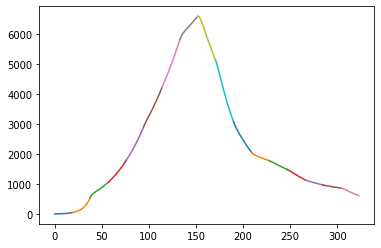

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

t = np.linspace(0, 20, 20) # para que se actualice cada n día

def modelo(r_0,e,i,r): # le pasamos r_0 de cada día
  N =   48200000
  E0, I0, R0 = e, i, r
  S0 = N - E0 - I0 - R0

  gamma = 1./5.1
  sigma = 1./2.9 
  beta = r_0 * gamma   # se calculo el beta por cada valor de r_0

  def deriv(y, t, N, beta, gamma, sigma):
    S, E, I, R = y
    dSdt = -beta * S * I / N
    dEdt = beta * S * I / N - sigma * E
    dIdt = sigma * E - gamma*I
    dRdt = gamma * I
    return dSdt, dEdt, dIdt, dRdt

  y0 = S0, E0, I0, R0

  ret = odeint(deriv, y0, t, args=(N, beta, gamma, sigma)) #sigma y gamma son constantes, beta se actualiza cada vez que calcula r_0
  S, E, I, R = ret.T
  return E, I, R

import cufflinks as cf
import plotly.offline as py

y = []
e_o = 5
i_o = 1
r_o = 0

for v in range(0,len(rt_lista),20):
  E, I , R = modelo(rt_lista[v], e_o, i_o, r_o)
  y.append(list(I))
  e_o = E[-1]
  i_o = I[-1]
  r_o = R[-1]

yn=[]
import matplotlib.pyplot as plt
x1=0
for i,y1 in enumerate(y):  
    x=range(x1,len(y1)*(i+1)-i)
    x1=len(y1)*(i+1)-i-1
    plt.plot(x,y1)

for y1 in y:
  for y2 in y1[:-1]:
    yn.append(y2)
xn=list(range(0,len(yn)))
xn
py.iplot([{
   'x': xn,
   'y': yn,
} ])
x1=0
py.iplot([{
   'x': list(range(i*(len(y1)-1),(len(y1))*(i+1))),
   'y': y1,
   'name':str(rt_lista[i])
}  for i,y1 in enumerate(y)], filename='cufflinks/multiple-lines-on-same-chart')

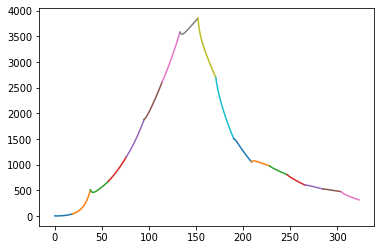

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

t = np.linspace(0, 20, 20) # para que se actualice cada n día

def modelo(r_0,e,i,r): # le pasamos r_0 de cada día
  N =   48200000
  E0, I0, R0 = e, i, r
  S0 = N - E0 - I0 - R0

  gamma = 1./5.1
  sigma = 1./2.9 
  beta = r_0 * gamma   # se calculo el beta por cada valor de r_0

  def deriv(y, t, N, beta, gamma, sigma):
    S, E, I, R = y
    dSdt = -beta * S * I / N
    dEdt = beta * S * I / N - sigma * E
    dIdt = sigma * E - gamma*I
    dRdt = gamma * I
    return dSdt, dEdt, dIdt, dRdt

  y0 = S0, E0, I0, R0

  ret = odeint(deriv, y0, t, args=(N, beta, gamma, sigma)) #sigma y gamma son constantes, beta se actualiza cada vez que calcula r_0
  S, E, I, R = ret.T
  return E, I, R

import cufflinks as cf
import plotly.offline as py

y = []
e_o = 5
i_o = 1
r_o = 0

for v in range(0,len(rt_lista),20):
  E, I , R = modelo(rt_lista[v], e_o, i_o, r_o)
  y.append(list(E))
  e_o = E[-1]
  i_o = I[-1]
  r_o = R[-1]

yn=[]
import matplotlib.pyplot as plt
x1=0
for i,y1 in enumerate(y):  
    x=range(x1,len(y1)*(i+1)-i)
    x1=len(y1)*(i+1)-i-1
    plt.plot(x,y1)

for y1 in y:
  for y2 in y1[:-1]:
    yn.append(y2)
xn=list(range(0,len(yn)))
xn
py.iplot([{
   'x': xn,
   'y': yn,
} ])
x1=0
py.iplot([{
   'x': list(range(i*(len(y1)-1),(len(y1))*(i+1))),
   'y': y1,
   'name':str(rt_lista[i])
}  for i,y1 in enumerate(y)], filename='cufflinks/multiple-lines-on-same-chart')

MODELO SEIR con MEDIDAS estático

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

gamma = 1./2.9
sigma = 1./5.1
mu = 0.35

ro1 = 2.5
beta1 = ro1*gamma

ro2= 2.3
beta2 = ro2*gamma

ro3 = 2
beta3 = ro3*gamma

ro4 = 1.7
beta4 = ro4*gamma

ro5 = 1.5
beta5 = ro5*gamma

ro6 = 1.3
beta6 = ro6*gamma

valores = [(beta1, gamma), (beta2, gamma), (beta3, gamma), (beta4, gamma), (beta5, gamma), (beta5, gamma)]

t = np.linspace(0, 1400, 1400)

def modelo(beta,gamma):
  N =   48200000
  E0, I0, R0 = 5, 1, 0
  S0 = N - E0 - I0 - R0

  def deriv(y, t, N, beta, gamma, sigma, mu):
    S, E, I, R = y
    dSdt = - (1 - mu) * beta * S * I / N
    dEdt = (1 - mu) * beta * S * I / N - sigma * E
    dIdt = sigma * E - gamma*I
    dRdt = gamma * I
    return dSdt, dEdt, dIdt, dRdt

  y0 = S0, E0, I0, R0

  ret = odeint(deriv, y0, t, args=(N, beta, gamma, sigma, mu))
  S, E, I, R = ret.T
  return I

import cufflinks as cf
import plotly.offline as py

py.iplot([{
   'x': t,
   'y': modelo(*valor),
   'name': str(valor),
}  for valor in valores], filename='cufflinks/multiple-lines-on-same-chart')

SEIR CON MEDIDAS dinámico

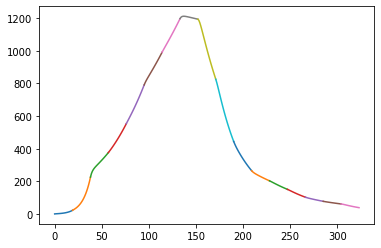

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

t = np.linspace(0, 20, 20)

def modelo(r_0, e, i , r):
  N =   48200000
  E0, I0, R0 = e, i, r
  S0 = N - E0 - I0 - R0

  gamma = 1./2.9
  sigma = 1./5.1
  mu = 0.05
  beta = r_0 * gamma

  def deriv(y, t, N, beta, gamma, sigma, mu):
    S, E, I, R = y
    dSdt = - (1 - mu) * beta * S * I / N
    dEdt = (1 - mu) * beta * S * I / N - sigma * E
    dIdt = sigma * E - gamma*I
    dRdt = gamma * I
    return dSdt, dEdt, dIdt, dRdt

  y0 = S0, E0, I0, R0

  ret = odeint(deriv, y0, t, args=(N, beta, gamma, sigma, mu))
  S, E, I, R = ret.T
  return E, I, R

import cufflinks as cf
import plotly.offline as py

y = []
e_o = 5
i_o = 1
r_o = 0

for v in range(0,len(rt_lista),20):
  E, I , R = modelo(rt_lista[v], e_o, i_o, r_o)
  y.append(list(I))
  e_o = E[-1]
  i_o = I[-1]
  r_o = R[-1]

yn=[]
import matplotlib.pyplot as plt
x1=0
for i,y1 in enumerate(y):  
    x=range(x1,len(y1)*(i+1)-i)
    x1=len(y1)*(i+1)-i-1
    plt.plot(x,y1)

for y1 in y:
  for y2 in y1[:-1]:
    yn.append(y2)
xn=list(range(0,len(yn)))
xn
py.iplot([{
   'x': xn,
   'y': yn,
} ])
x1=0
py.iplot([{
   'x': list(range(i*(len(y1)-1),(len(y1))*(i+1))),
   'y': y1,
   'name':str(rt_lista[i])
}  for i,y1 in enumerate(y)], filename='cufflinks/multiple-lines-on-same-chart')

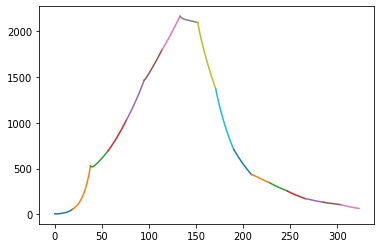

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

t = np.linspace(0, 20, 20)

def modelo(r_0, e, i , r):
  N =   48200000
  E0, I0, R0 = e, i, r
  S0 = N - E0 - I0 - R0

  gamma = 1./2.9
  sigma = 1./5.1
  mu = 0.05
  beta = r_0 * gamma

  def deriv(y, t, N, beta, gamma, sigma, mu):
    S, E, I, R = y
    dSdt = - (1 - mu) * beta * S * I / N
    dEdt = (1 - mu) * beta * S * I / N - sigma * E
    dIdt = sigma * E - gamma*I
    dRdt = gamma * I
    return dSdt, dEdt, dIdt, dRdt

  y0 = S0, E0, I0, R0

  ret = odeint(deriv, y0, t, args=(N, beta, gamma, sigma, mu))
  S, E, I, R = ret.T
  return E, I, R

import cufflinks as cf
import plotly.offline as py

y = []
e_o = 5
i_o = 1
r_o = 0

for v in range(0,len(rt_lista),20):
  E, I , R = modelo(rt_lista[v], e_o, i_o, r_o)
  y.append(list(E))
  e_o = E[-1]
  i_o = I[-1]
  r_o = R[-1]

yn=[]
import matplotlib.pyplot as plt
x1=0
for i,y1 in enumerate(y):  
    x=range(x1,len(y1)*(i+1)-i)
    x1=len(y1)*(i+1)-i-1
    plt.plot(x,y1)

for y1 in y:
  for y2 in y1[:-1]:
    yn.append(y2)
xn=list(range(0,len(yn)))
xn
py.iplot([{
   'x': xn,
   'y': yn,
} ])
x1=0
py.iplot([{
   'x': list(range(i*(len(y1)-1),(len(y1))*(i+1))),
   'y': y1,
   'name':str(rt_lista[i])
}  for i,y1 in enumerate(y)], filename='cufflinks/multiple-lines-on-same-chart')